### INGESTION

In [2]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Dataset.csv")

### EDA

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
# print missing values in df
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
# drop null values
df.dropna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


c:\ProgramData\Anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


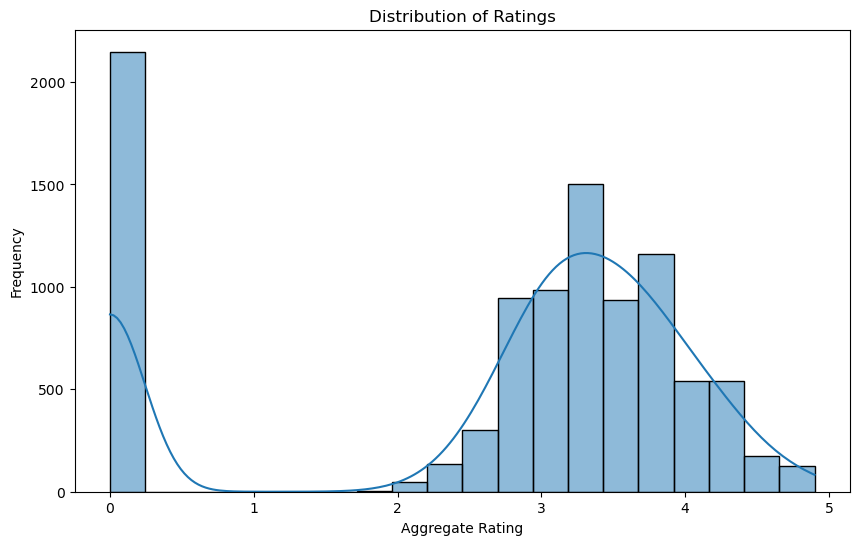

In [10]:
# Showing Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df["Aggregate rating"], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

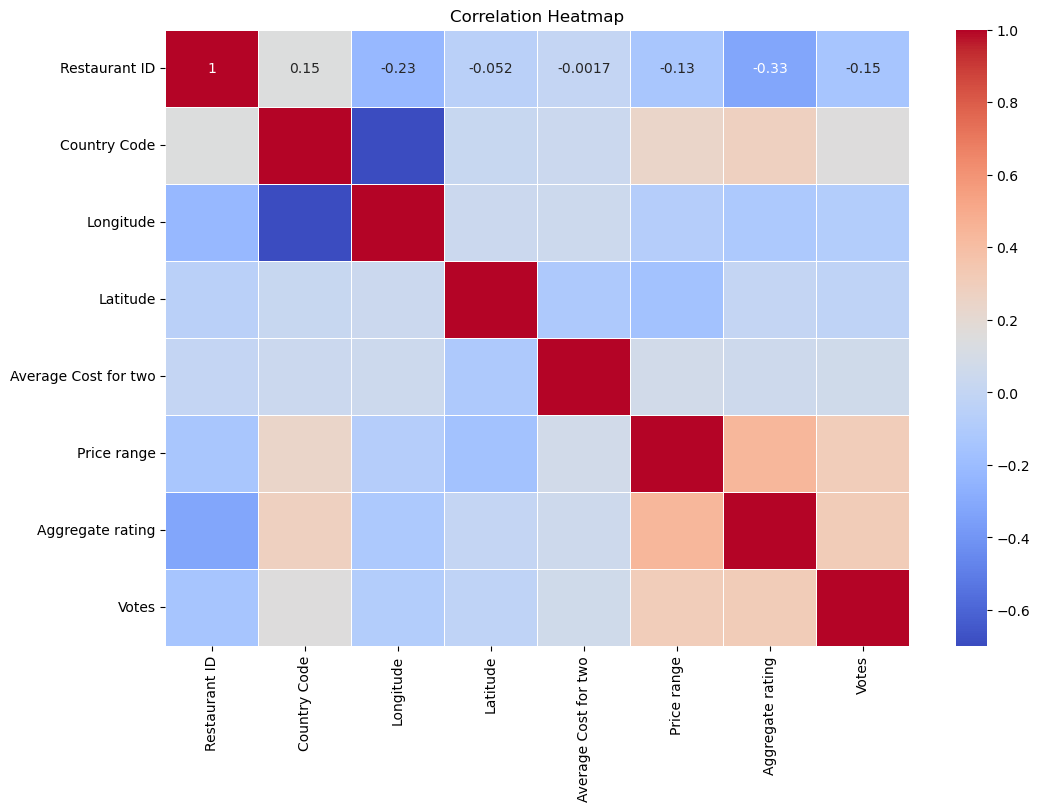

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

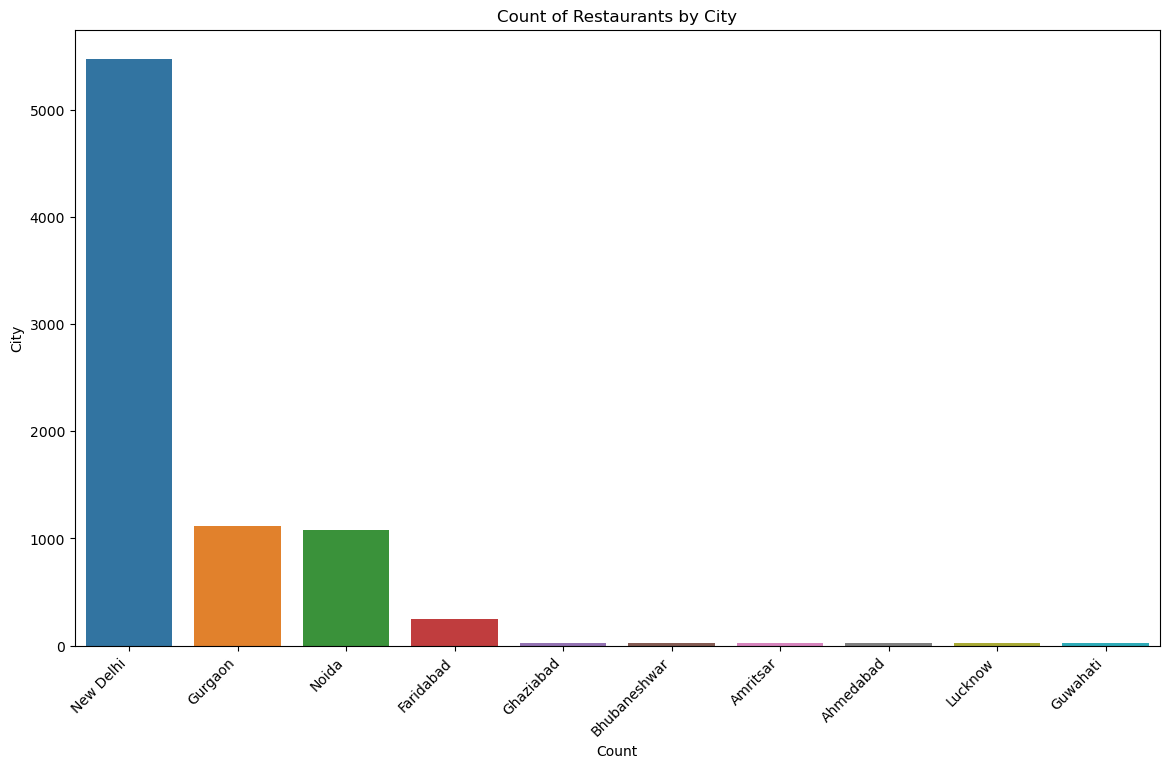

In [12]:
# Count plot of Restaurants by City (limit to top 10 cities)
top_cities = df["City"].value_counts().head(10).index  # Top 10 cities by count
plt.figure(figsize=(14, 8))
sns.countplot(x="City", data=df[df["City"].isin(top_cities)], order=top_cities)
plt.title("Count of Restaurants by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.show()

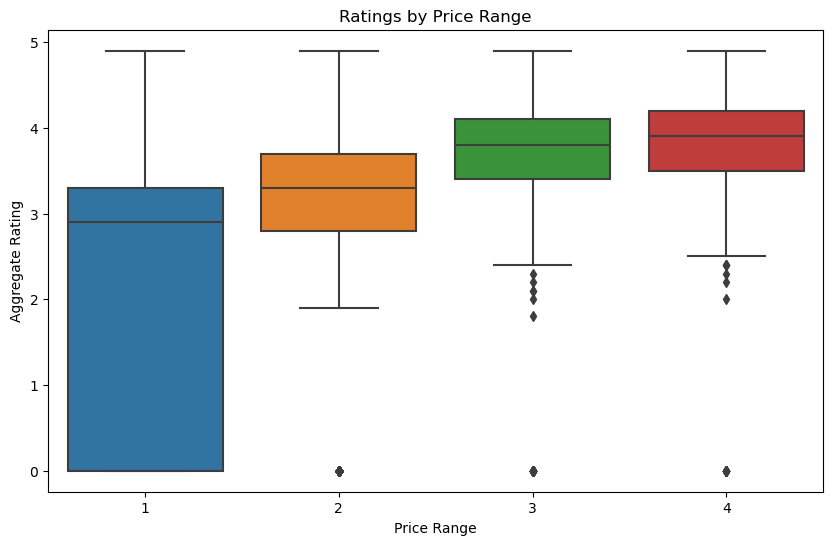

In [13]:
# Box plot of Ratings by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x="Price range", y="Aggregate rating", data=df)
plt.title("Ratings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()

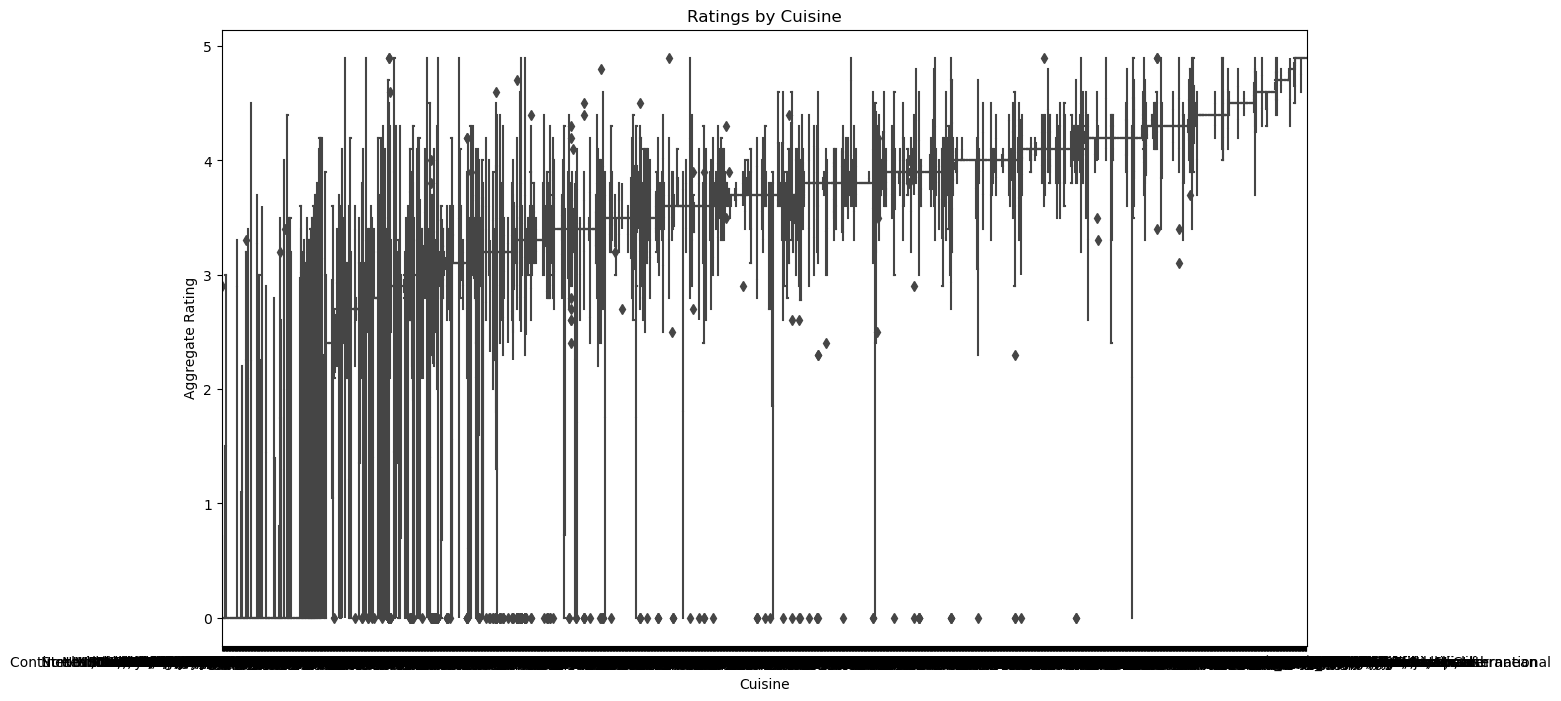

In [14]:
# Box plot of Ratings by Cuisine
plt.figure(figsize=(14, 8))
sns.boxplot(
    x="Cuisines",
    y="Aggregate rating",
    data=df,
    order=df.groupby("Cuisines")["Aggregate rating"].median().sort_values().index,
)
plt.title("Ratings by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Aggregate Rating")
plt.show()

In [15]:
# Selecting relevant features
features = [
    "Country Code",
    "City",
    "Locality",
    "Longitude",
    "Latitude",
    "Cuisines",
    "Average Cost for two",
    "Has Table booking",
    "Has Online delivery",
    "Is delivering now",
    "Price range",
    "Votes",
]
X = df[features]
X.tail()

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes
9546,208,��stanbul,Karak�_y,28.977392,41.022793,Turkish,80,No,No,No,3,788
9547,208,��stanbul,Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,3,1034
9548,208,��stanbul,Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,4,661
9549,208,��stanbul,Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,No,No,No,4,901
9550,208,��stanbul,Moda,29.026016,40.984776,Cafe,55,No,No,No,2,591


In [16]:
# Target variable
y = df["Aggregate rating"]
y.head()

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [17]:
# Preprocessing for numerical features
numerical_features = [
    "Longitude",
    "Latitude",
    "Average Cost for two",
    "Price range",
    "Votes",
]
num_transformer = StandardScaler()

In [18]:
# Preprocessing for categorical features
categorical_features = [
    "Country Code",
    "City",
    "Locality",
    "Cuisines",
    "Has Table booking",
    "Has Online delivery",
    "Is delivering now",
]
categ_transformer = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [19]:
# Combine Preprocessing for numerical and cataegorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_features),
        ("cat", categ_transformer, categorical_features),
    ]
)

In [20]:
# Showing the preprocessor
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Longitude', 'Latitude',
                                  'Average Cost for two', 'Price range',
                                  'Votes']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Country Code', 'City', 'Locality',
                                  'Cuisines', 'Has Table booking',
                                  'Has Online delivery',
                                  'Is delivering now'])])

In [21]:
# Apply the preprocessor to the features
X_processed = preprocessor.fit_transform(X)

c:\ProgramData\Anaconda3\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

### MODELING

In [23]:
# Define the model using Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predictions
y_pred = linear_model.predict(X_test)

In [25]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.4000193236490025e+20
R-squared: -6.150932708449261e+19


In [26]:
# Define the model Using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predictions
rf_model_pred = rf_model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, rf_model_pred)
r2 = r2_score(y_test, rf_model_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.08874336106750397
R-squared: 0.961010935133015


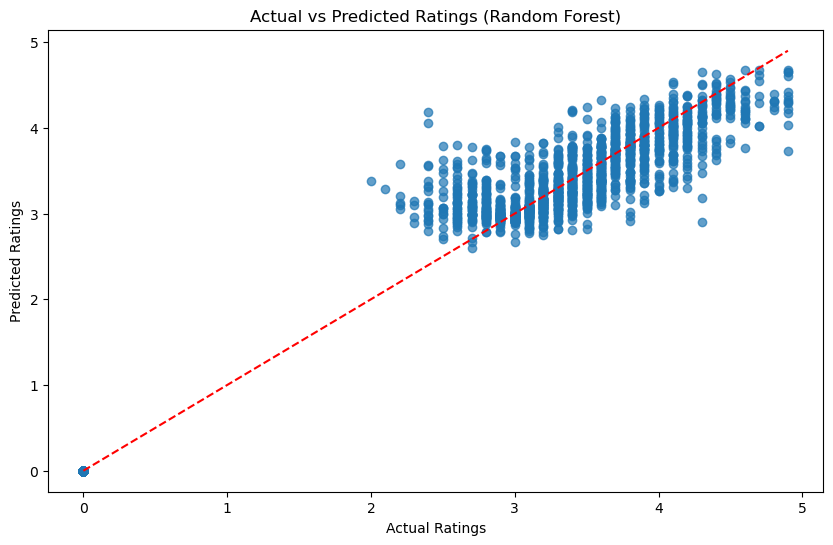

In [29]:
# Plot Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model_pred, alpha=0.7)
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--"
)
plt.show()

In [30]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a Dataframe for feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
)

# Sort the Dataframe in order of importances
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

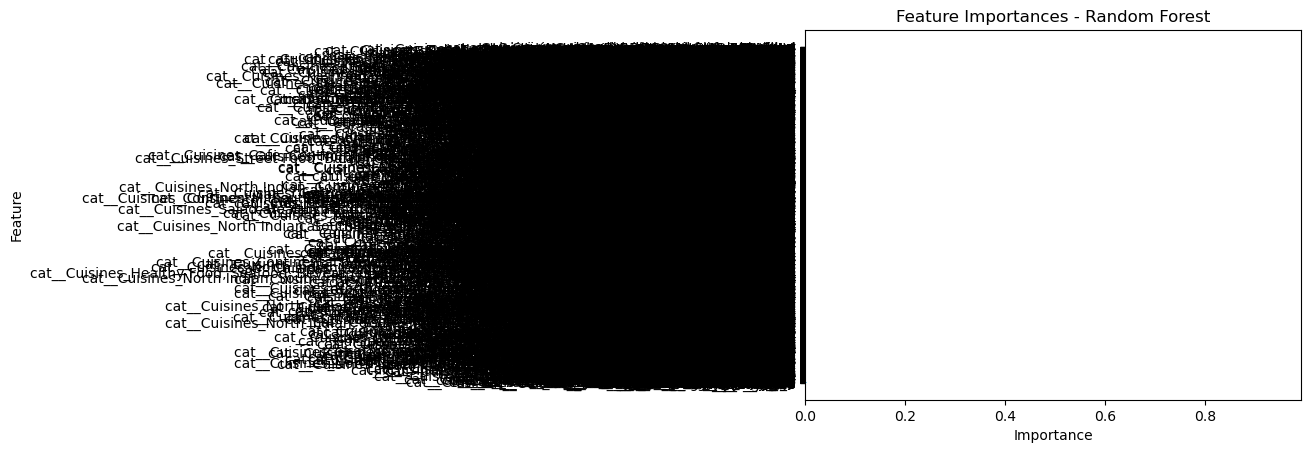

In [31]:
# Plot the feature importances
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"],
    color="skyblue",
)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

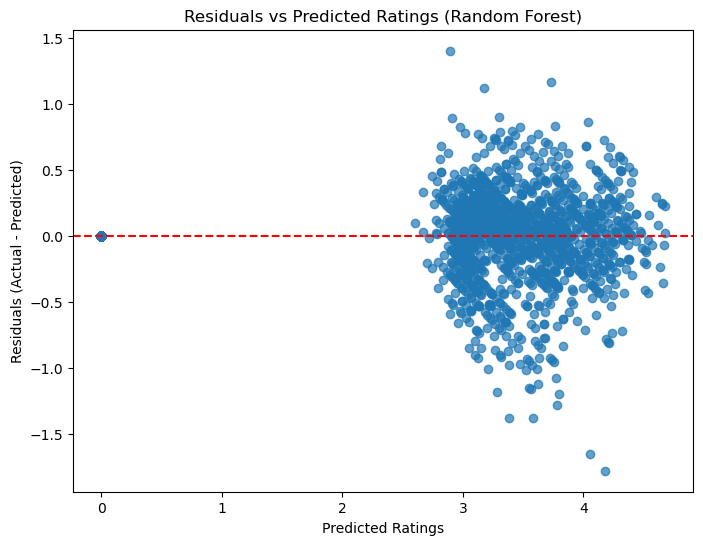

In [32]:
# Calculate residuals
residuals = y_test - rf_model_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_model_pred, residuals, alpha=0.7)
plt.title("Residuals vs Predicted Ratings (Random Forest)")
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals (Actual - Predicted)")
plt.axhline(0, color="red", linestyle="--")  # Ideal line (residuals = 0)
plt.show()

## Conclusion

In this project, we aimed to predict restaurant ratings using features like city, votes, and cuisine type. After conducting Exploratory Data Analysis (EDA), data preprocessing, and model evaluation, the following conclusions were drawn:

### Key Findings:
- The Random Forest model outperformed other models with an R-squared value of **0.96** and a Mean Squared Error of **0.089**. 
- The most significant predictors of restaurant ratings were:
  - **Votes**: Strong positive correlation with ratings.
  - **Average Cost for Two**: Indicates a relationship between pricing and customer satisfaction.
  - **Cuisine Type**: Revealed regional preferences affecting ratings.

### Limitations:
- The dataset primarily included structured data, excluding customer reviews or other unstructured inputs that could provide deeper insights.
- The model may require further validation on live or unseen data for generalization.

### Recommendations:
- Future work could include incorporating textual data from customer reviews using NLP techniques.
- Explore additional ensemble methods and hyperparameter tuning to improve model performance further.
- Deploy the Random Forest model as a starting point for a recommendation system.

